# Baseball Case Study

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('../datasets/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Dataset is having numeric type columns i.e. continuous values in the data.

### Project Description

The dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

Since data values are numeric in nature, this is a regression problem.

In [3]:
# Checking columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Columns names are displayed where 'W' is the target variable and all other are independent variables.

In [4]:
# Checking datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here, all the columns are of numeric type including the target variableb (W-Wins)

In [5]:
#Checking the dataset shape
df.shape

(30, 17)

Dataset is having 30 rows and 17 columns (16 input features and 1 output feature).

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


It gives additional information regardng the dataset like RangeIndex, Data columns, datatypes. We can see there is no null values in the dataset. Also, datatype seems to be appropriate so there is no need of data conversion.

### EDA and Visualisatons

In [7]:
# Checking unique values counts
for i in df.columns :
    print(i,' : ',df[i].nunique())
    print('-----------------')

W  :  24
-----------------
R  :  28
-----------------
AB  :  29
-----------------
H  :  29
-----------------
2B  :  22
-----------------
3B  :  23
-----------------
HR  :  27
-----------------
BB  :  29
-----------------
SO  :  29
-----------------
SB  :  27
-----------------
RA  :  30
-----------------
ER  :  30
-----------------
ERA  :  30
-----------------
CG  :  9
-----------------
SHO  :  12
-----------------
SV  :  20
-----------------
E  :  21
-----------------


We have checked number of unique values in all the columns and there are total 24 unique values in target variable.

<AxesSubplot:xlabel='W', ylabel='count'>

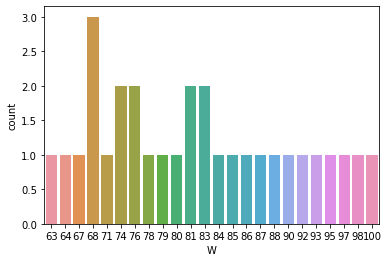

In [8]:
# Visualizing value counts
sns.countplot(df['W'])

Value counts of classes are almost similar i.e. in range of 1-3.

In [9]:
# Checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

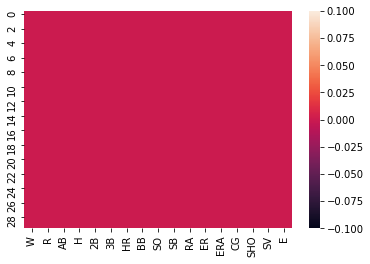

In [10]:
# Visualizing nulls
sns.heatmap(df.isnull())

Map showing 0 null values in the dataset

In [11]:
# Checking correlation
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Few features are seem to have a strong correlation with the target. Let's visualize for better understanding.

<AxesSubplot:>

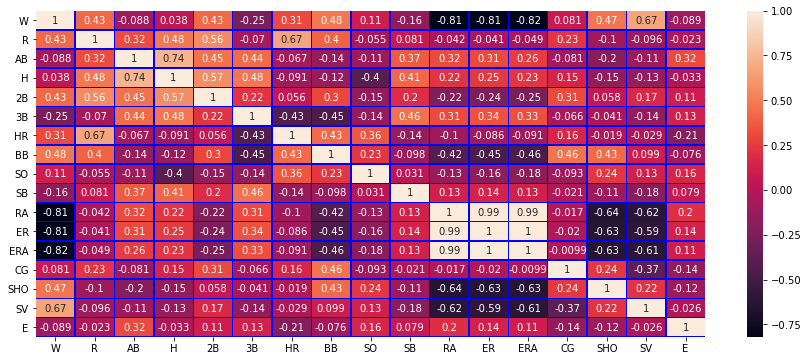

In [12]:
# Visualzing correlation
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='b')

Columns R, 2B, BB, SHO have a good correlation with target. 
Columns RA, ER, ERA, SV are strongly correlated with the target. Rest columns have a weak correlation with the target variable.

In above heatmap, we can see columns like RA & ER, RA & ERA, ERA & ER, R & HR, R & 2B, SV & ERA, SV & ER, SV & RA, etc are highly correlated with each other. This implies that multicollinearity exists here.

ERA is most correlated with the target and H is least correlated with the target.

In [13]:
# Drop least correlated column 
#df.drop('H',axis=1,inplace=True)
#df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [13]:
# Describe dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Standard deviation seems high for most of the columns.

Right skewed (mean>median) : Columns AB,H,HR,CG,SV,E
Left skewed  (mean<median) : Columns 2B,BB,SO,RA,ER,ERA,SHO

Difference of 50% and max value for detecting outliers seem to be fine.

In [14]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

We can see there is an outlier present.

In [15]:
# Checking the outlier in the dataset
z[5]

array([1.17081355, 3.50964704, 0.10488389, 1.36108904, 1.86983209,
       1.39150098, 2.18504658, 1.79874163, 0.95279649, 0.20060853,
       0.25718416, 0.38910394, 0.35016492, 1.3004422 , 0.32091429,
       1.17184786, 0.46146963])

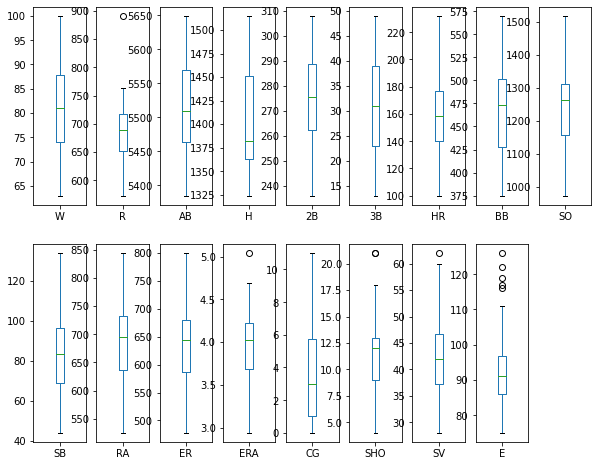

In [16]:
# Visualising outliers
df.plot(kind='box',subplots=True,layout=(2,9), figsize=(10,8))
plt.show()

Plot shows the outliers presence in the columns.

In [17]:
# Checking skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Skewness is present in dataset columns : R,CG,SV,E as acceptable range of the skewness in data is +/-5.

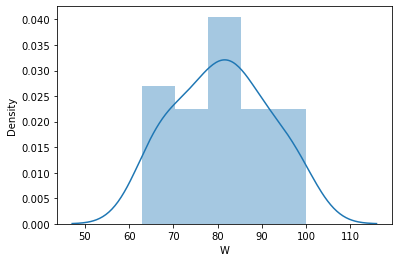

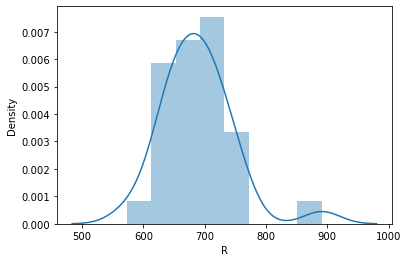

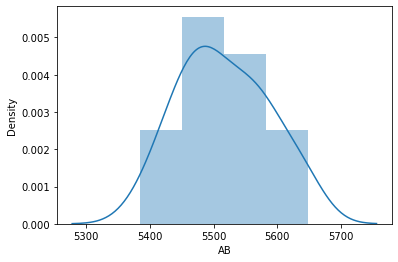

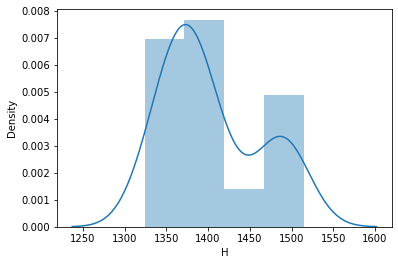

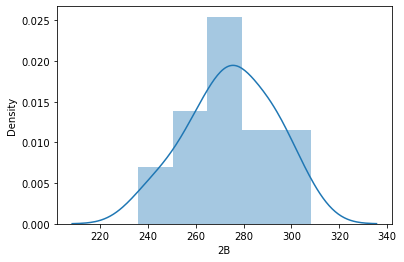

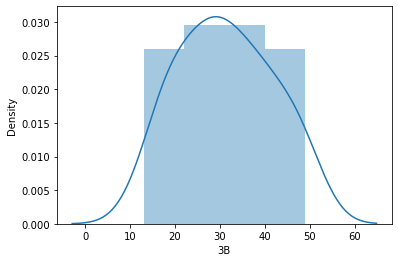

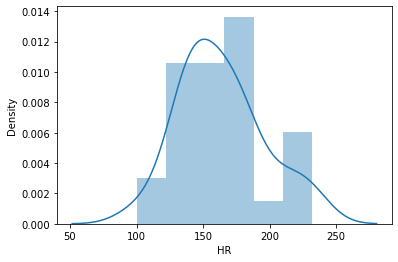

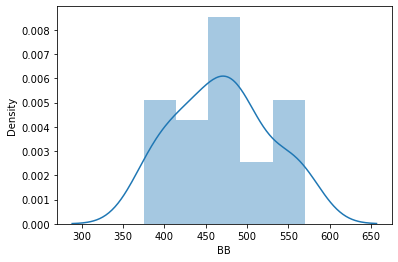

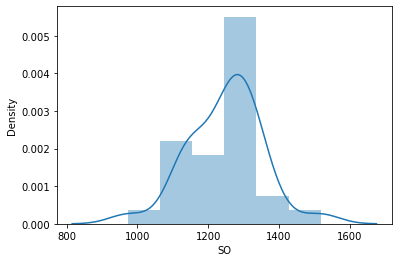

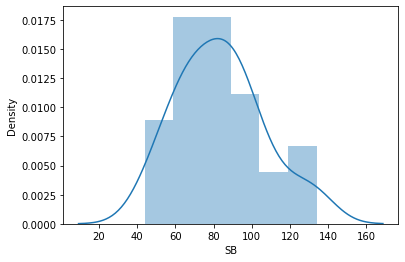

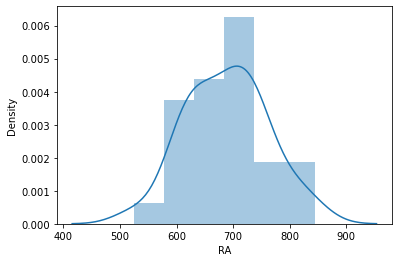

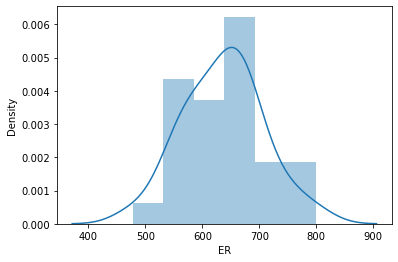

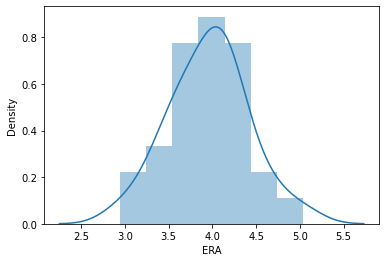

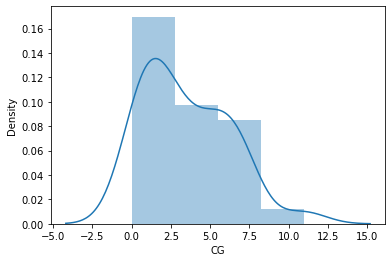

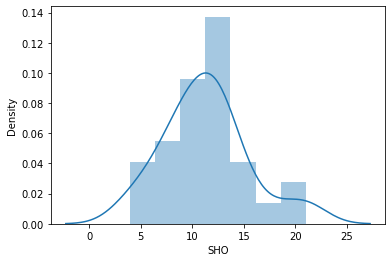

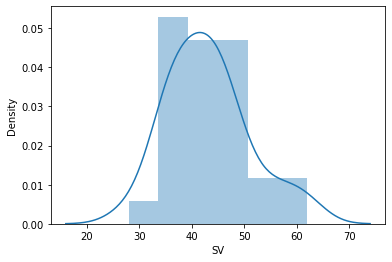

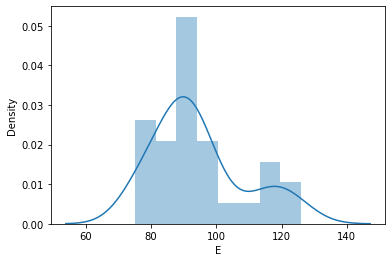

In [18]:
# Visualizing skewness
for i in df.columns :
    sns.distplot(df[i])
    plt.show()

Data is right skewed (positive skewness) in R,HR,CG,SHO,SV,E.

Somewhat left skewed (negative skewness) in SO. 

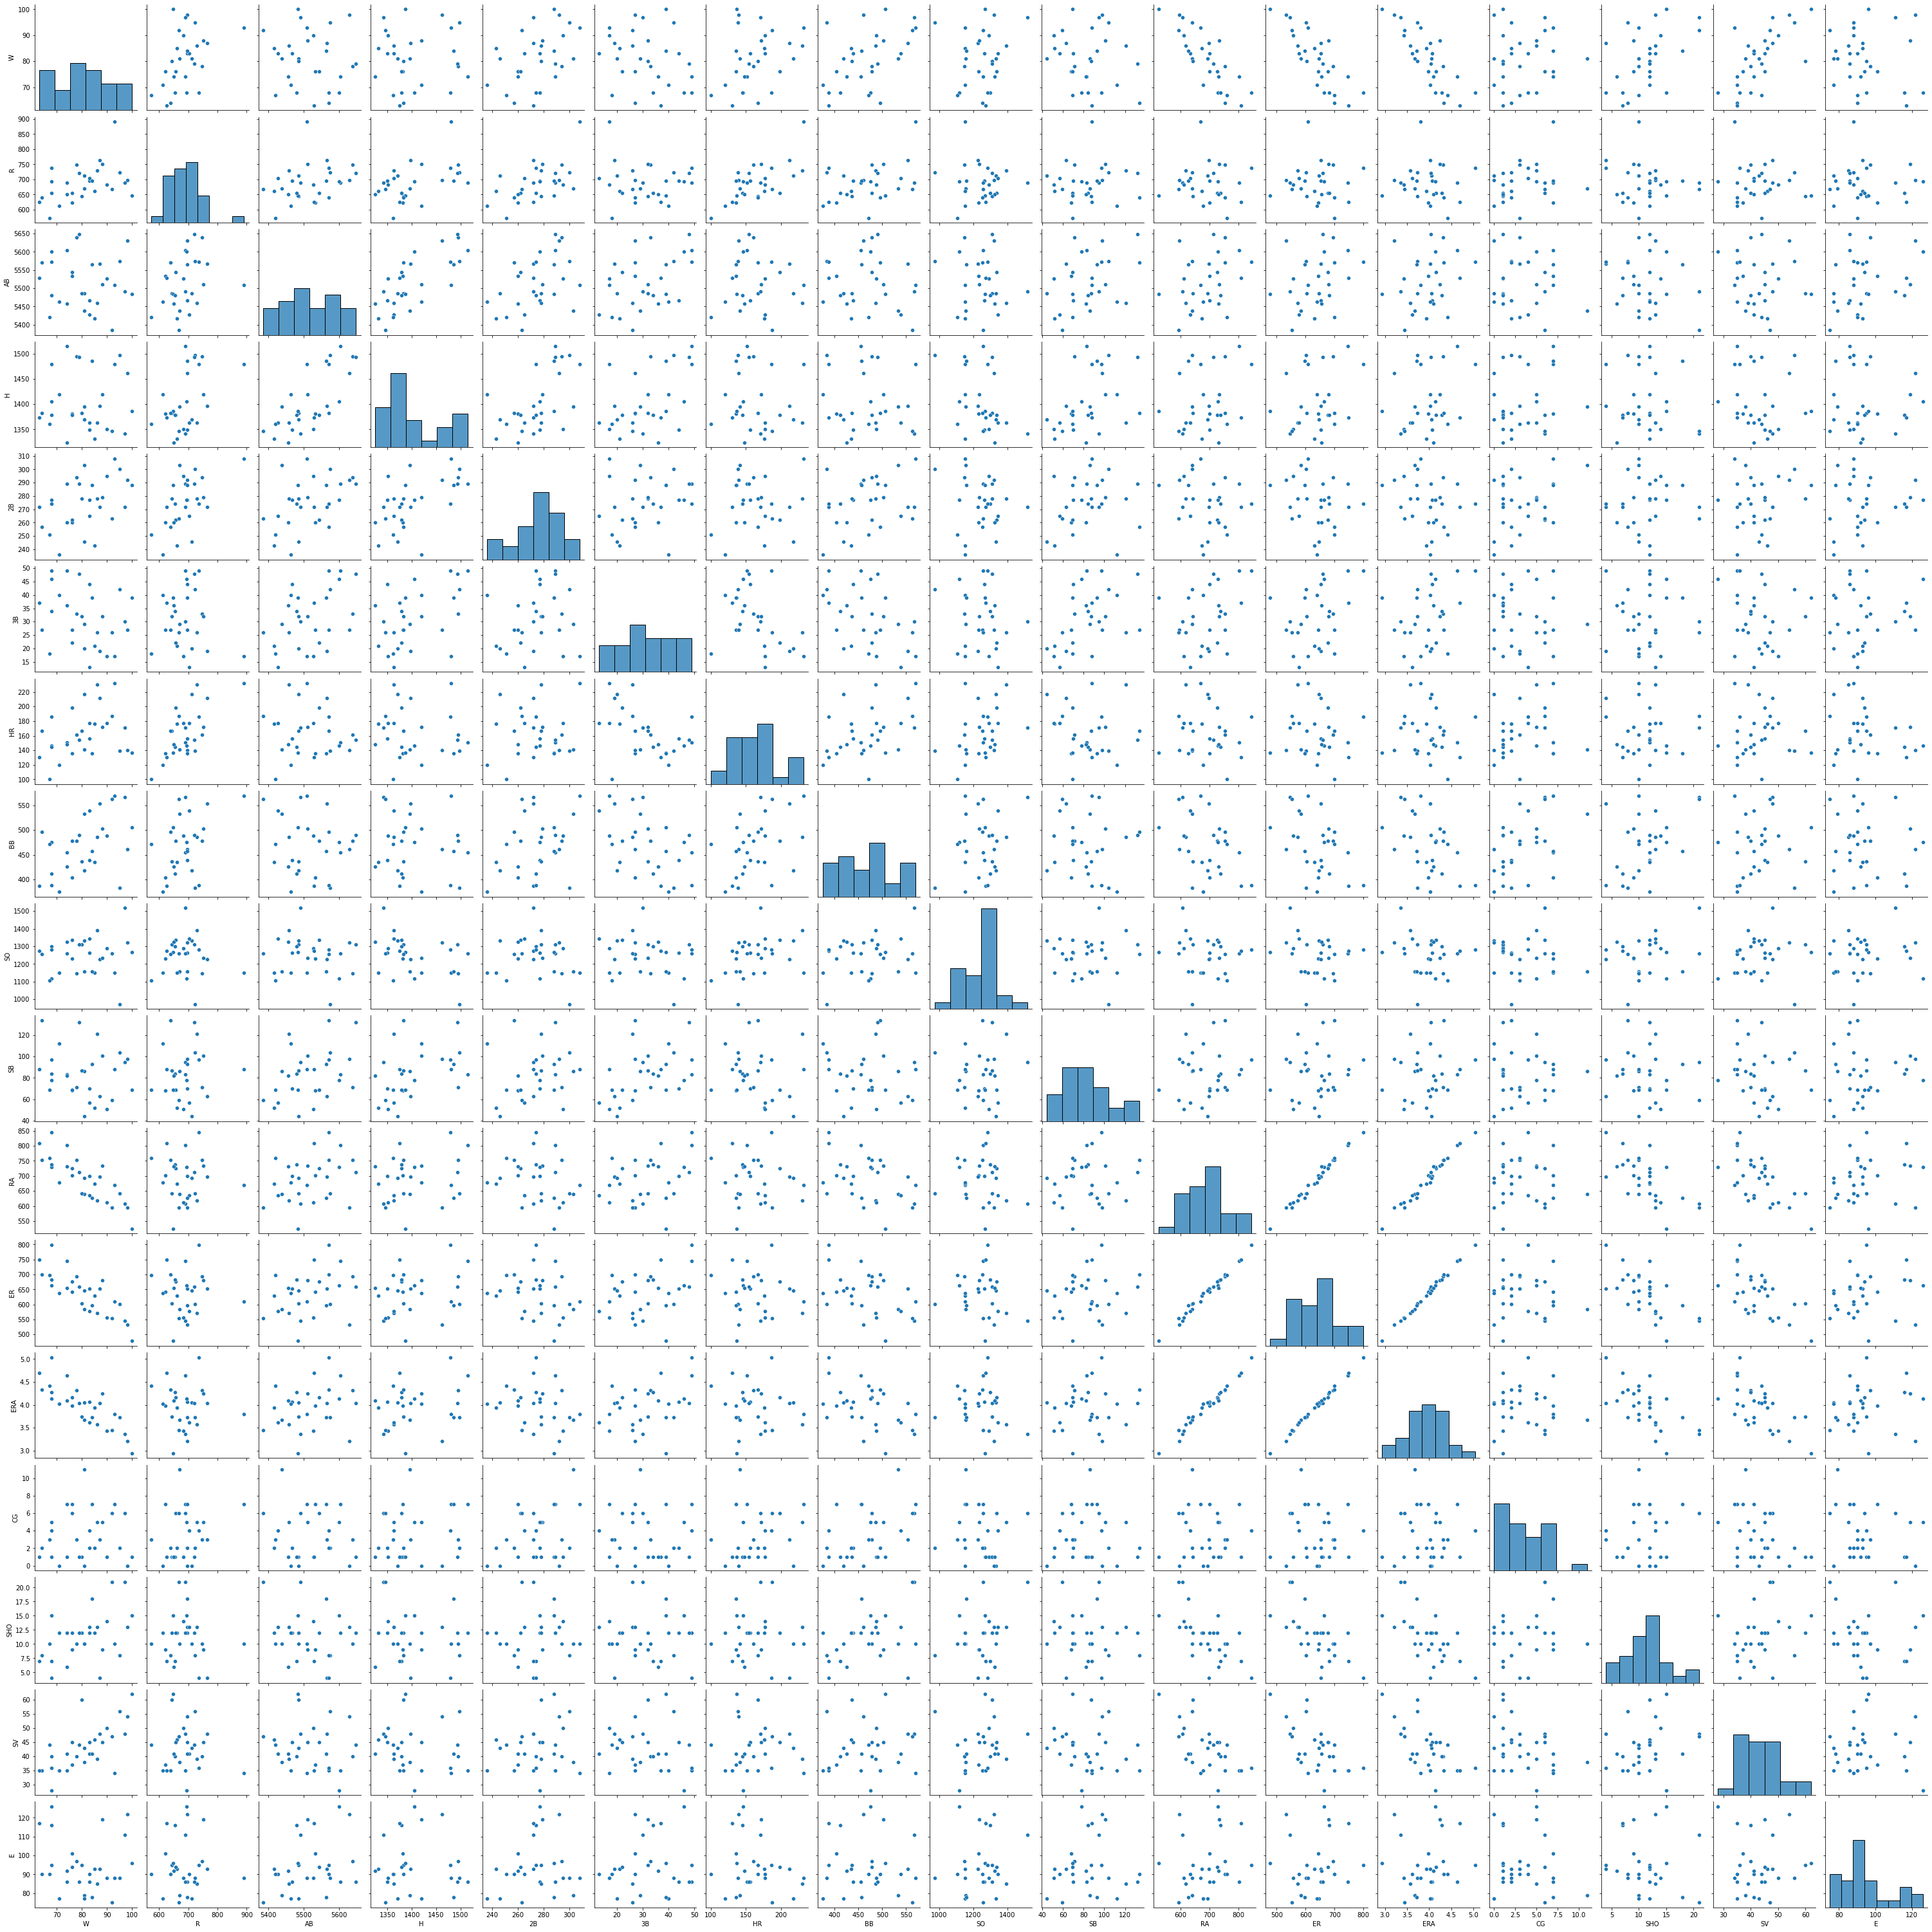

In [19]:
# Plotting pairplot
sns.pairplot(df)
plt.show()

Here, the pairplot is showing the relationship of each column with the other column.

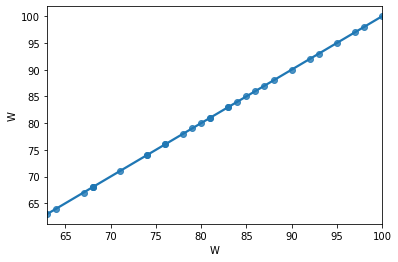

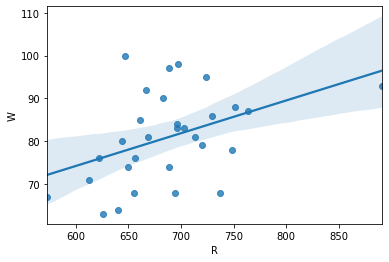

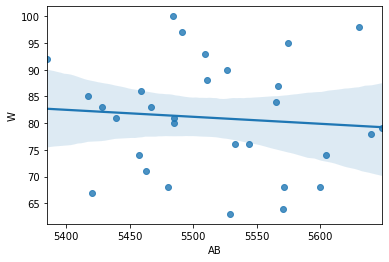

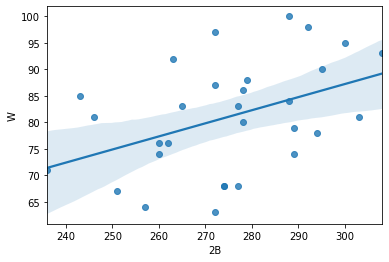

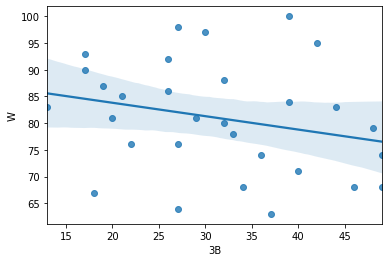

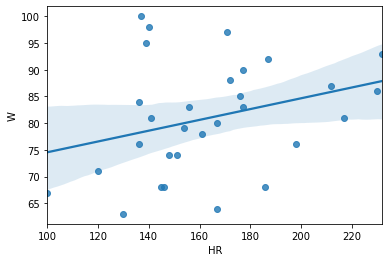

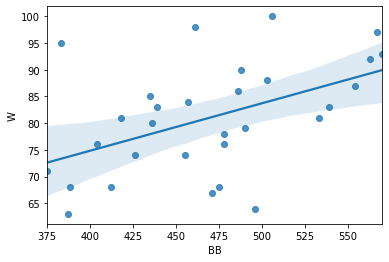

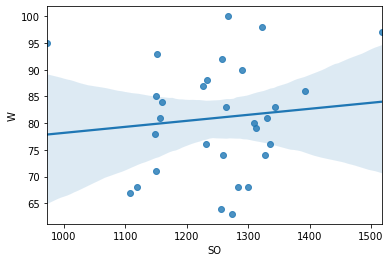

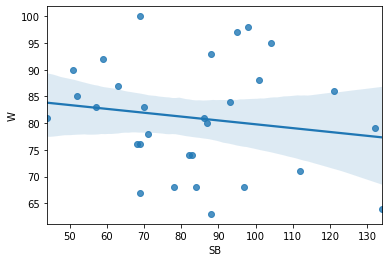

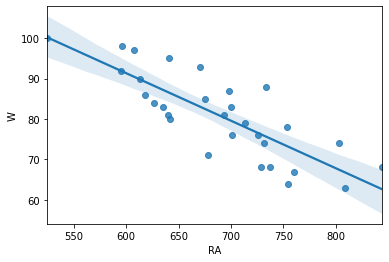

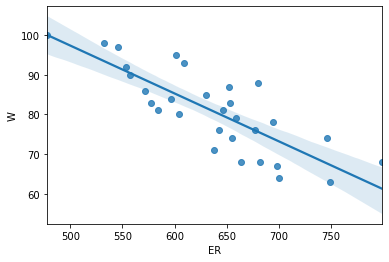

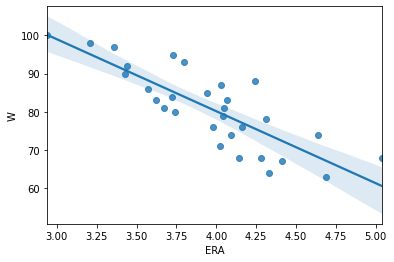

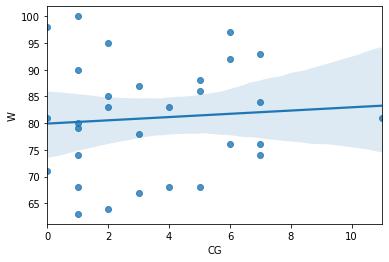

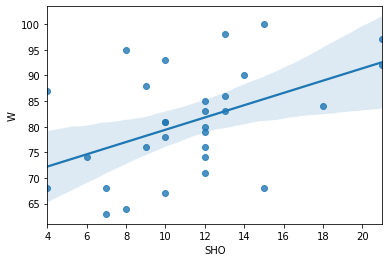

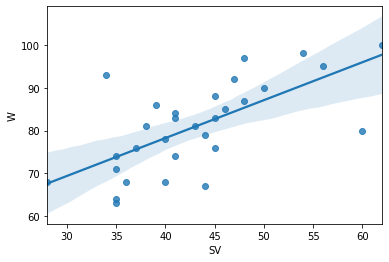

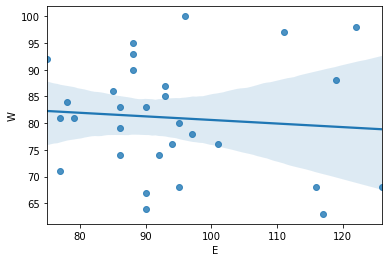

In [21]:
# Plotting predicted wins with every other column for analysis
for i in df.columns :
    #print(i)
    sns.regplot(i,'W',data=df)
    plt.show()

As per the regplot: R,2B,HR,BB,SHO,SV are linear positive correlated with target. 3B,RA,ER,ERA are linearly negative correlated with target. Rest features have less or no correlation with the target.

With increase in RA (Run Average), predicted wins decreases. There is strong negative correlation between 'W' and 'RA'. 

With increase in ERA (Earned Run Average), predicted wins decreases. There is strong negative correlation between 'W' and 'ERA'.

With increase in ER (Earned Run), predicted wins decreases. There is strong negative correlation between 'W' and 'ER'.

Predicted wins are high with high number of SV(Save), but most wins are when SV is above 45.

Remaining columns do not have much impact on target column (W).

<AxesSubplot:xlabel='RA', ylabel='SHO'>

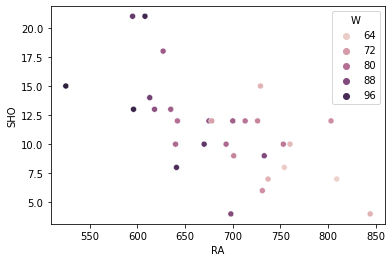

In [22]:
sns.scatterplot('RA','SHO',data=df, hue='W')

Predicted wins decreases with increase in RA (Run Average) and decrease in SHO (Shutout). SHO and RA have strong negative correlation.

<AxesSubplot:xlabel='RA', ylabel='ER'>

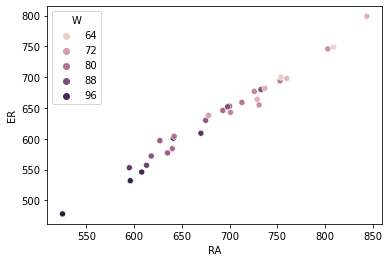

In [23]:
sns.scatterplot('RA','ER',data=df, hue='W')

RA & ER are very strongly positively correlated with each other. Predicted wins decreases with increase in ER & RA.

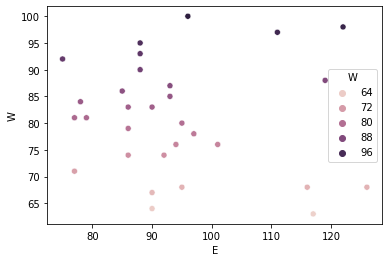

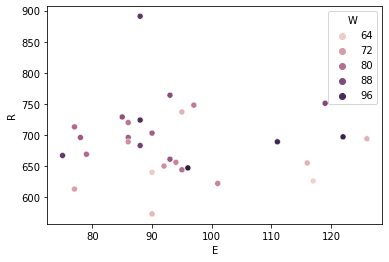

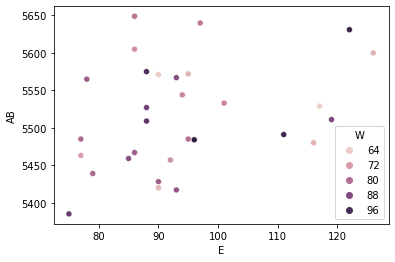

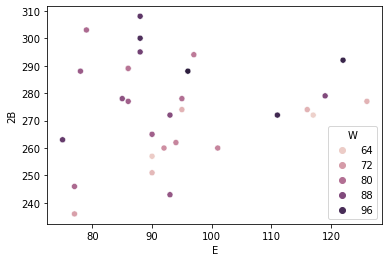

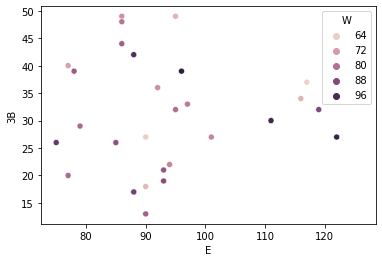

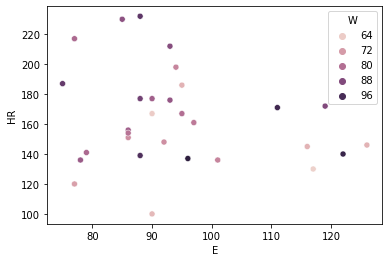

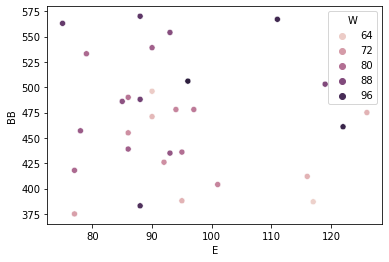

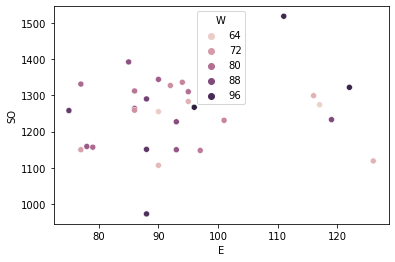

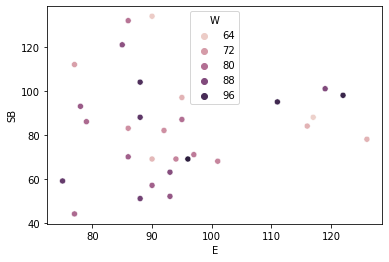

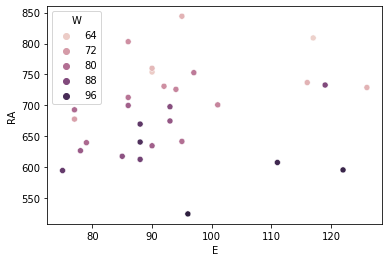

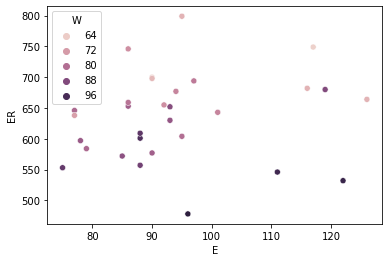

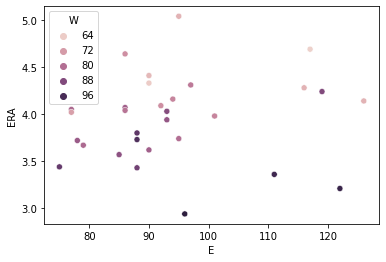

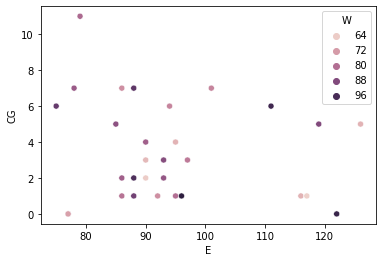

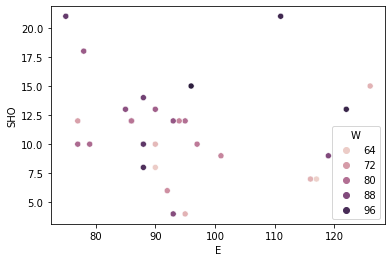

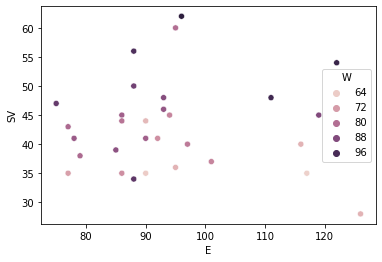

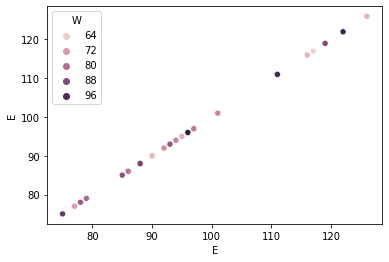

In [24]:
for i in df.columns :
    #print(i)
    sns.scatterplot('E',i,data=df, hue='W')
    plt.show()

E doesn't have much impact on predicted wins (W) and Errors (E) have bad correlation with every other column.

<AxesSubplot:xlabel='RA', ylabel='Count'>

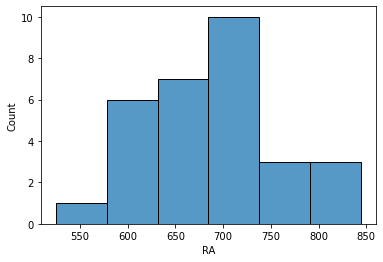

In [25]:
sns.histplot(df['RA'])

RA (Run Average) around 700 has the higest frequency

<AxesSubplot:xlabel='W', ylabel='Count'>

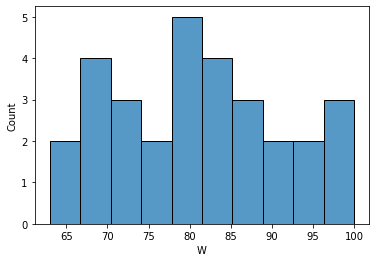

In [26]:
sns.histplot(df['W'],bins=10)

Predicted wins are mostly in the range of 66-70 and 78-81

In [27]:
df[(df['W']>=66) & (df['W']<=70)].value_counts()

W   R    AB    2B   3B  HR   BB   SO    SB  RA   ER   ERA   CG  SHO  SV  E  
67  573  5420  251  18  100  471  1107  69  760  698  4.41  3   10   44  90     1
68  655  5480  274  34  145  412  1299  84  737  682  4.28  1   7    40  116    1
    694  5600  277  46  146  475  1119  78  729  664  4.14  5   15   28  126    1
    737  5572  274  49  186  388  1283  97  844  799  5.04  4   4    36  95     1
dtype: int64

Showed predicted wins records in the range of 66-70, displayed in histogram

In [28]:
df[(df['W']>=78) & (df['W']<=81)].value_counts()

W   R    AB    2B   3B  HR   BB   SO    SB   RA   ER   ERA   CG  SHO  SV  E 
78  748  5640  294  33  161  478  1148  71   753  694  4.31  3   10   40  97    1
79  720  5649  289  48  154  490  1312  132  713  659  4.04  1   12   44  86    1
80  644  5485  278  32  167  436  1310  87   642  604  3.74  1   12   60  95    1
81  669  5439  303  29  141  533  1157  86   640  584  3.67  11  10   38  79    1
    713  5485  246  20  217  418  1331  44   693  646  4.05  0   10   43  77    1
dtype: int64

Showed predicted wins records in the range of 78-81, displayed in histogram

### Data Cleaning

In [19]:
# Removing outliers

df1=df.copy()
df1=df1[(z<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [20]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (30, 17)
Shape of dataset after removing outliers :  (29, 17)


In [21]:
# Percentage Data lost
data_percent=(30-29)/30 * 100
data_percent

3.3333333333333335

Approx 3% data is lost after removing the outliers

In [22]:
# Checking skewness after removing outliers
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can see high skewness is present in the columns : H, CG, SHO, SV, E

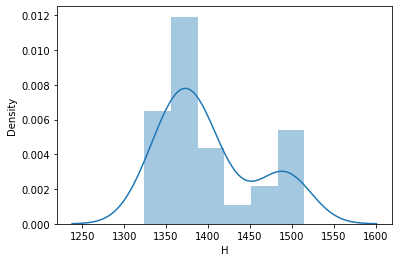

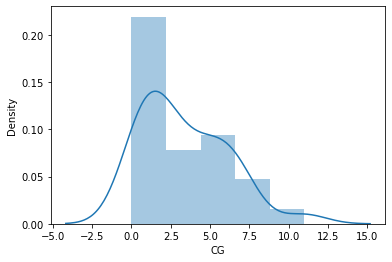

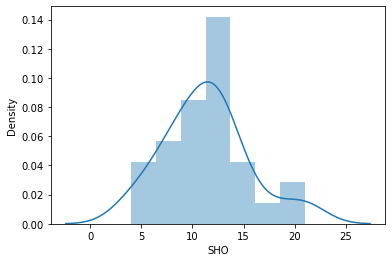

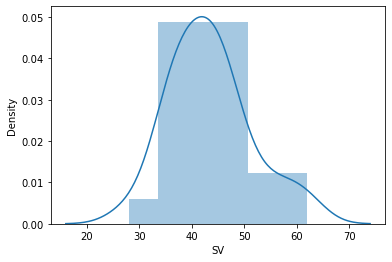

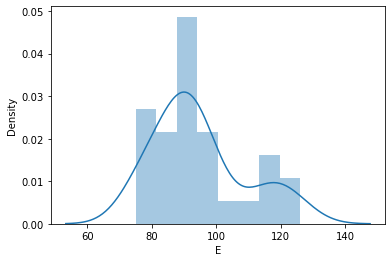

In [23]:
# Visualizng skewness
df2=df1.copy()
skew_list=['H', 'CG', 'SHO', 'SV', 'E']
for i in skew_list :
    sns.distplot(df2[i])
    plt.show()

We can see columns 'CG', 'SHO', 'SV', 'E' were right skewed i.e. positive skewness.

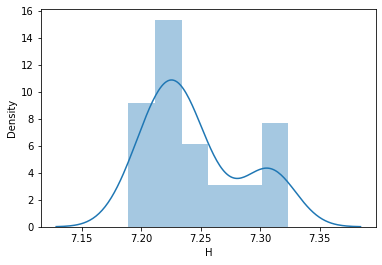

0.7384552415046411


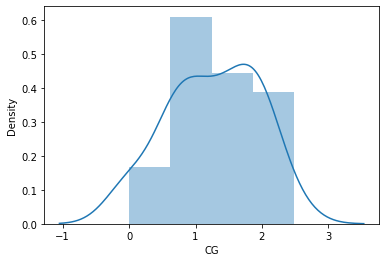

-0.27568126677232746


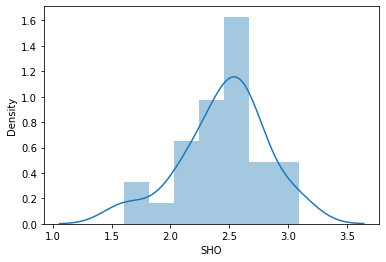

-0.5980727656381557


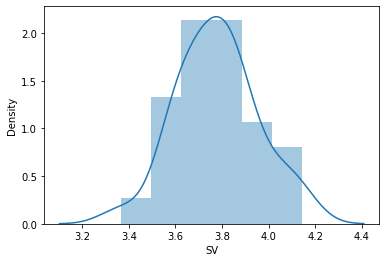

0.10998261671190347


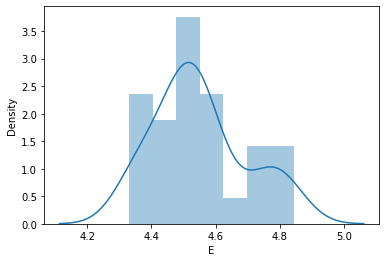

0.5861010094649194


In [26]:
# Removing skewness
for i in skew_list :
    df2[i]=np.log(df1[i]+1)
    sns.distplot(df2[i])
    plt.show()
    print(df2[i].skew())

We have removed the skewness from the dataset. Checking again.

In [27]:
df2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

In [68]:
# Plotting Q-Q plot for showing gaussian distribution
def diagnostic_plot(df2,col) :
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10)
    
    plt.subplot(1,2,2)
    stats.probplot(df2[col],dist='norm',plot=plt)
    
    plt.show()

W


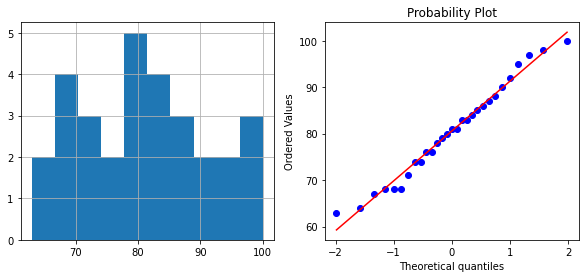

R


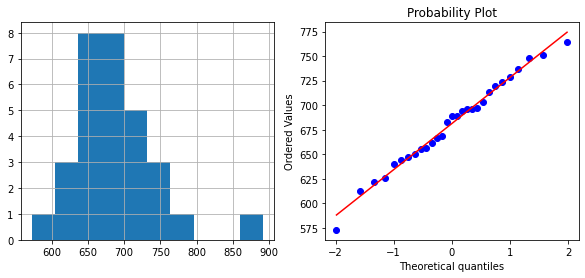

AB


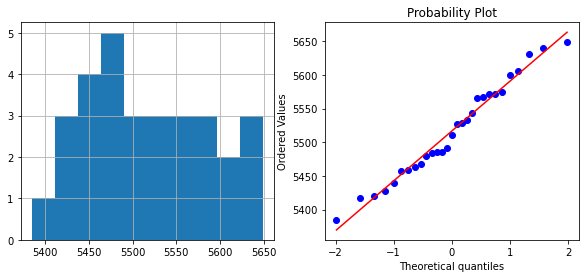

H


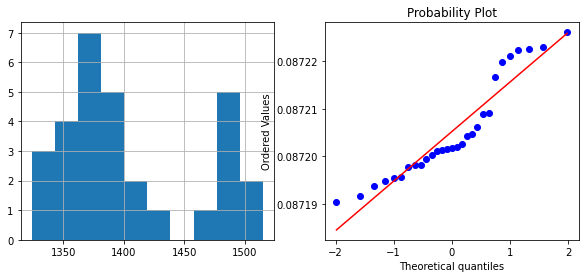

2B


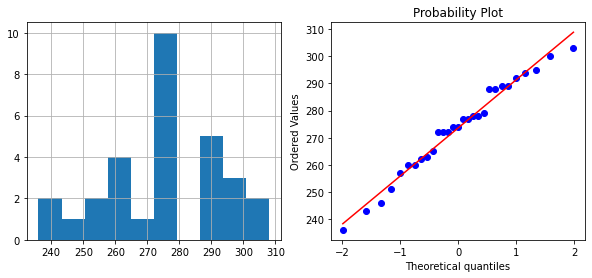

3B


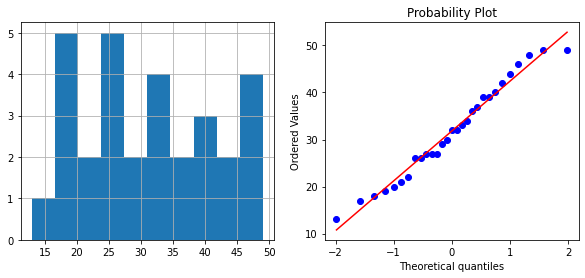

HR


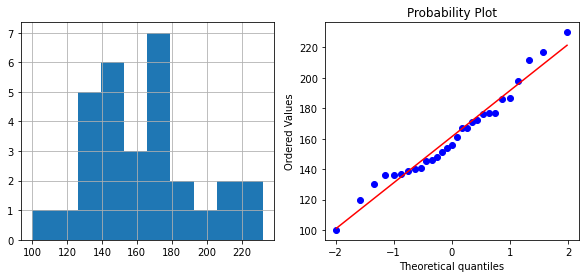

BB


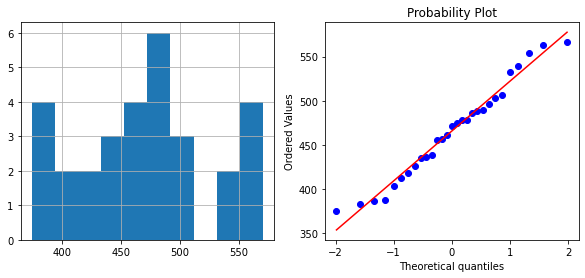

SO


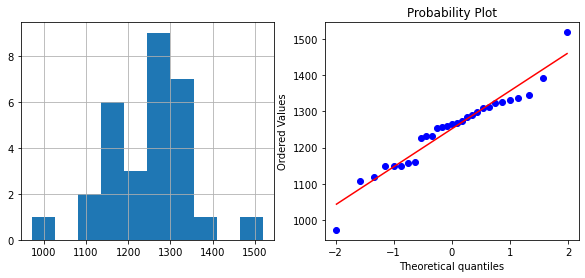

SB


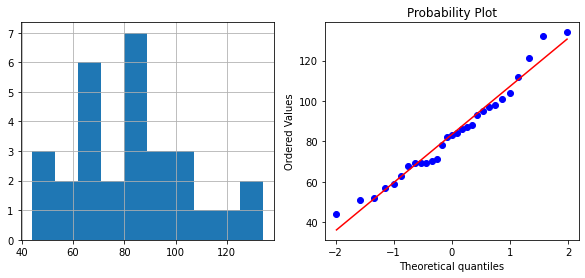

RA


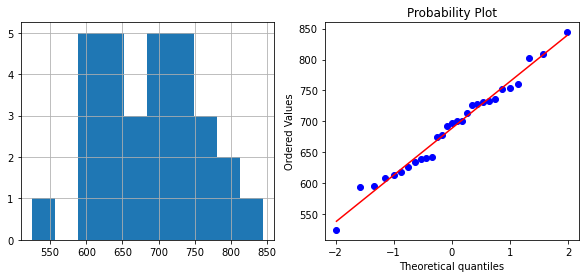

ER


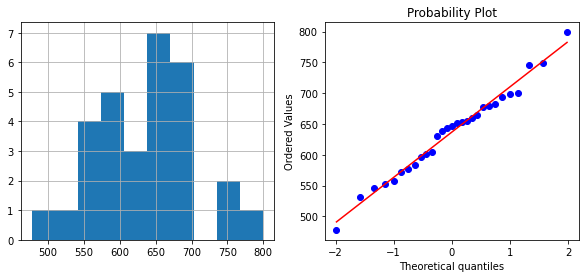

ERA


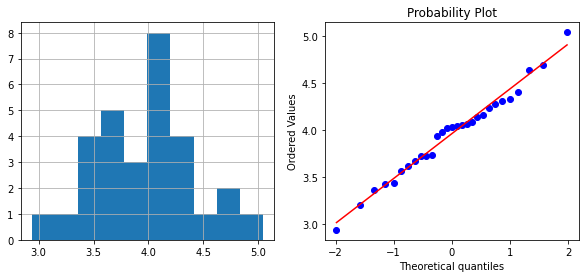

CG


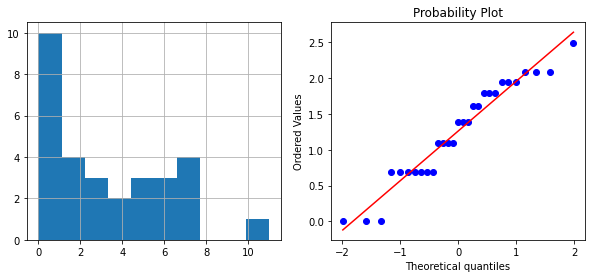

SHO


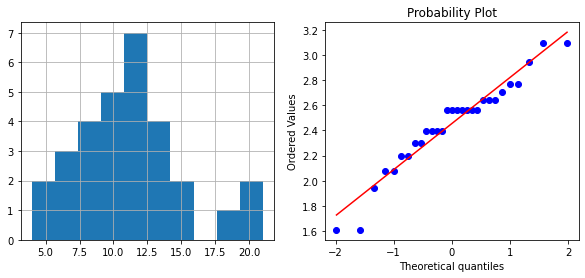

SV


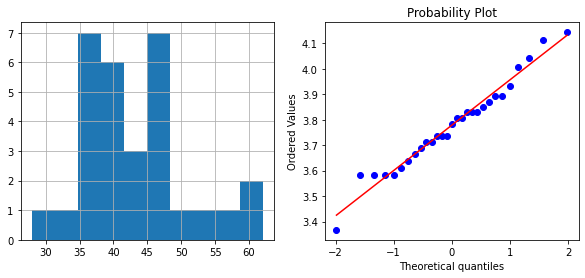

E


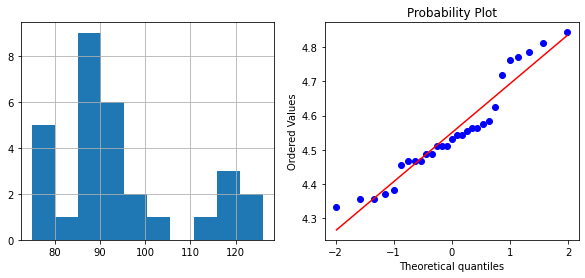

In [69]:
for i in df2.columns :
    print(i)
    diagnostic_plot(df2,i)

Above probablity plots showing the skewed data still in H.

In [70]:
# Checking skewness
df2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.728387
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

In [82]:
from scipy.stats import boxcox,yeojohnson
#df3=df2.copy()
df2['H']=yeojohnson(df2['H'],0)
df2['H'].skew()

0.72837598193691

H has moderately skewed data and threshold for it is 0.7 as per the distribution of data in ths column.

Therefore, Removed skewness from the dataset.

In [84]:
# New dataset
df2

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,0.083627,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,696,5467,0.083601,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,669,5439,0.083610,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,622,5533,0.083607,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,689,5605,0.083630,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
6,87,764,5567,0.083610,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,81,713,5485,0.083605,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,80,644,5485,0.083607,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,78,748,5640,0.083626,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967
10,88,751,5511,0.083614,279,32,172,503,1233,101,733,680,4.24,1.791759,2.302585,3.828641,4.787492


### Separating columns into x and y

In [85]:
x=df2.drop('W',axis=1)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,0.083627,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,696,5467,0.083601,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,669,5439,0.083610,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,622,5533,0.083607,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,689,5605,0.083630,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
6,764,5567,0.083610,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,713,5485,0.083605,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,644,5485,0.083607,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,748,5640,0.083626,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967
10,751,5511,0.083614,279,32,172,503,1233,101,733,680,4.24,1.791759,2.302585,3.828641,4.787492


In [86]:
y=df2.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [87]:
print('Orginal dataset shape: ',df2.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (29, 17)
Shape of data in x :  (29, 16)
Shape of data in x :  (29,)


### Multicollinearity with VIF

In [88]:
# Importing libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,R,1443.319828
1,AB,67840.631788
2,H,69983.043823
3,2B,897.962538
4,3B,33.364746
5,HR,230.585419
6,BB,239.937430
7,SO,409.950834
8,SB,24.772933
9,RA,17102.901227


ER and ERA are having high collinearity with Target and with each other as well. So we can any column among these.

In [91]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('ER',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,R,1063.509727
1,AB,19940.386227
2,H,16944.427700
3,2B,820.201421
4,3B,32.126668
5,HR,163.801326
6,BB,238.780821
7,SO,405.915516
8,SB,23.440107
9,RA,10789.389537


'AB' and 'H' still have High collinearity and Both are weakly correlated with target.

In [92]:
xn=xn.drop(['AB'],axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,R,978.312823
1,H,4156.839025
2,2B,748.952236
3,3B,32.028739
4,HR,161.785144
5,BB,231.317499
6,SO,371.130735
7,SB,20.905222
8,RA,8111.986056
9,ERA,7112.923677


High Multicollinearity is still present in RA and ERA. Both are strongly correlated with target.

In [105]:
# Drop highest collinear column and check multicollinearity
xn=xn.drop('RA',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,R,976.670196
1,H,3962.319571
2,2B,688.140962
3,3B,31.321383
4,HR,154.773128
5,BB,207.691245
6,SO,327.874210
7,SB,20.729081
8,ERA,298.882493
9,CG,9.314456


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [106]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(xn)
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.959398,1.720463,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.240415,-0.722413,1.554812,-0.435733
1,0.331147,-0.952245,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.240415,0.312085,0.296229,-0.598110
2,-0.274666,-0.084744,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,1.815711,-0.157879,-0.672787,-1.197382
3,-1.329231,-0.345033,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.214333,-0.426009,-0.825263,0.538291
4,0.174084,2.023497,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.214333,0.312085,-1.142637,-0.598110
5,1.856900,-0.047820,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,0.186270,-2.375997,0.667088,-0.045239
6,0.712585,-0.551811,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.869855,-0.157879,0.035297,-1.378259
7,-0.835605,-0.307653,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.841793,0.312085,1.952930,0.105172
8,1.497899,1.686520,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,0.186270,-0.157879,-0.379227,0.252482
9,1.565212,0.354149,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.787648,-0.426009,0.296229,1.699369


Scaling is done and difference between the low and high values has been minimized.

### Find best randon state for Train-Test Split

In [107]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

In [121]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    if round(acctrain,1)==round(acctest,1) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Best random state :  3  Accuracy(Training) :  93.63435060705548  Accuracy(Testing) :  89.60889543126271
Best random state :  15  Accuracy(Training) :  92.35474761913792  Accuracy(Testing) :  94.59048921616484
Best random state :  29  Accuracy(Training) :  93.99215930557828  Accuracy(Testing) :  89.18351312203919
Best random state :  50  Accuracy(Training) :  93.42282936999057  Accuracy(Testing) :  88.09611278521731
Best random state :  67  Accuracy(Training) :  94.12782967370367  Accuracy(Testing) :  90.26665756790663
Best random state :  73  Accuracy(Training) :  94.27487245867972  Accuracy(Testing) :  88.57342476807972
Best random state :  95  Accuracy(Training) :  93.10190094726913  Accuracy(Testing) :  89.46862437203576
Best random state :  97  Accuracy(Training) :  94.13753918022789  Accuracy(Testing) :  87.29346715200458
Best random state :  99  Accuracy(Training) :  94.08155124982653  Accuracy(Testing) :  91.86867731952292
Random state with maximum accuracy :  47  Accuracy(Train

Here, training & testing accuracies are almost same for random state=15. So, lets take 15 as our best random state.

In [115]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 13)
(9, 13)
(20,)
(9,)


### Finding the best algorithm

In [116]:
# Installed xgboost for findng best algorithm
#!pip install xgboost

In [117]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [118]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()

In [124]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtr,knn,svr,rf]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svr :
        for j in svr_kernel :
            svr=SVR(kernel=j)
            svr.fit(x_train,y_train)
            pred=svr.predict(x_test)
            acc=r2_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svr1=SVR(kernel=j)
        print(svr1)
        svr1.fit(x_train,y_train)
        predtrain=svr1.predict(x_train)
        predtest=svr1.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
        
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  94.08155124982653  Accuracy(Test)  91.86867731952292
mean_absolute_error 2.9307893500467466
mean_squared_error 12.404784489216697


DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  64.60305899490167
mean_absolute_error 6.666666666666667
mean_squared_error 54.0


KNeighborsRegressor()
Accuracy(Training) :  59.64370388792174  Accuracy(Test)  65.7305171158048
mean_absolute_error 6.9333333333333345
mean_squared_error 52.28000000000001


SVR(kernel='linear')
Accuracy(Training) :  89.07788649198355  Accuracy(Test)  84.14018666116968
mean_absolute_error 4.022513716202627
mean_squared_error 24.195026349126703


RandomForestRegressor()
Accuracy(Training) :  93.59467731907486  Accuracy(Test)  68.41527676620537
mean_absolute_error 6.148333333333336
mean_squared_error 48.18425000000003




Checking for cross validation score/mean for selecting the best performing model.

### Cross Validation

In [131]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x1,y,cv=4).mean()*100))

CV mean of  LinearRegression()  is  47.659635276375695
CV mean of  DecisionTreeRegressor()  is  80.61715130362406
CV mean of  KNeighborsRegressor()  is  43.64048995335439
CV mean of  SVR(kernel='linear')  is  60.486157731441814
CV mean of  RandomForestRegressor()  is  48.78614686413759


SVR(kernel='linear') is showing least difference between accuracy and CV mean. Hence, selecting this model.

### Hyperparameter Tuning

In [145]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
              'C' : [1,5,10],
              'degree' : [3,8],
              'coef0' : [0.01,10,0.5],
              'gamma' : ('auto','scale')}

svr=SVR() #SVR(kernel='linear')
GCV=GridSearchCV(svr,parameters,cv=4)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [151]:
svr=SVR(C=1,coef0=0.01,degree=3,gamma='auto',kernel='linear')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(svr,x1,y,cv=4).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8414018666116968  CV mean :  0.6048615773144181


After hyperparameter tuning, Accuracy and CV score are coming same as aforementioned.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [152]:
# Saved the model in .pkl file
import pickle
file='baseball.pkl'
pickle.dump(svr,open(file,'wb'))

### Conclusion

In [153]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8414018666116968

We are getting 84% accuracy with trained model on test data.

In [142]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(6, 13)
(6,)


In [143]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':np.round(predicted).astype(int)})
conclusion

,Orignal,Predicted
0,67,78
1,63,69
2,97,88
3,76,82
4,83,83
5,92,86
